In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import random
from DescisionTree import DescisionTree, BaggedDecisionTree

# Descision trees classifier for drugs

### Preparing the data

In [2]:
df = pd.read_csv("Data/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df["Drug"].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [4]:
df['Age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

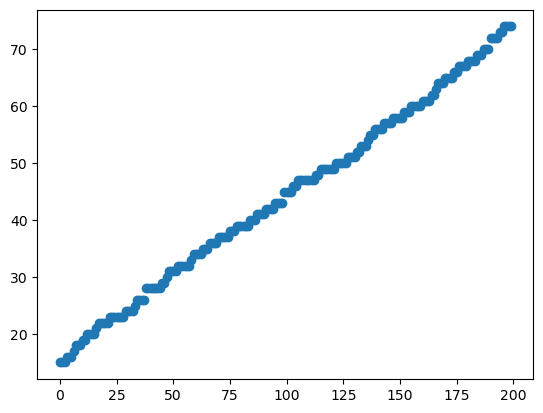

In [5]:
ages = df['Age']
ages = ages.sort_values()
plt.scatter(range(ages.size),ages.values)

In [6]:
conditions = [df['Age'] <= 35, (df['Age']> 35) & (df['Age'] <= 54), df['Age'] > 54]
bins = ["YOUNG","MIDDLE","OLD"]

df['Age'] = np.select(conditions, bins,default=None)

In [7]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,YOUNG,F,HIGH,HIGH,25.355,drugY
1,MIDDLE,M,LOW,HIGH,13.093,drugC
2,MIDDLE,M,LOW,HIGH,10.114,drugC
3,YOUNG,F,NORMAL,HIGH,7.798,drugX
4,OLD,F,LOW,HIGH,18.043,drugY


In [8]:
df['Age'].describe()

count        200
unique         3
top       MIDDLE
freq          71
Name: Age, dtype: object

In [9]:
df['Age'].value_counts()

MIDDLE    71
YOUNG     66
OLD       63
Name: Age, dtype: int64

In [10]:
df['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

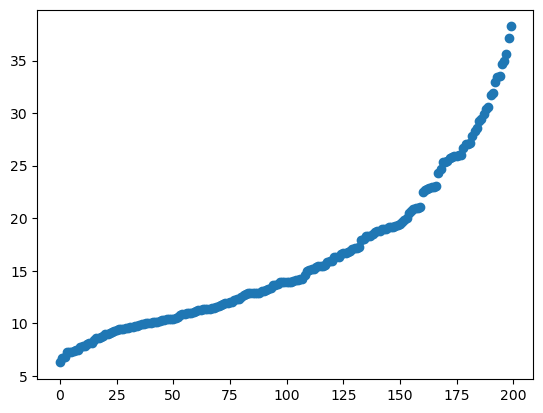

In [11]:
ages = df['Na_to_K']
plt.scatter(range(ages.size),ages.sort_values().values)

In [12]:
conditions = [df['Na_to_K'] <= 12, (df['Na_to_K'] > 12) & (df['Na_to_K'] <= 18.5), df['Na_to_K'] > 18.5]
choices = ['LOW',"MEDIUM",'HIGH']

df['Na_to_K'] = np.select(condlist=conditions,choicelist=choices,default=None)

In [13]:
df['Na_to_K'].describe()

count     200
unique      3
top       LOW
freq       75
Name: Na_to_K, dtype: object

In [14]:
df['Na_to_K'].value_counts()

LOW       75
MEDIUM    64
HIGH      61
Name: Na_to_K, dtype: int64

### Using the descision tree

In [15]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,YOUNG,F,HIGH,HIGH,HIGH,drugY
1,MIDDLE,M,LOW,HIGH,MEDIUM,drugC
2,MIDDLE,M,LOW,HIGH,LOW,drugC
3,YOUNG,F,NORMAL,HIGH,LOW,drugX
4,OLD,F,LOW,HIGH,MEDIUM,drugY


In [16]:
training = df.iloc[:,:-1]
training

,Age,Sex,BP,Cholesterol,Na_to_K
0,YOUNG,F,HIGH,HIGH,HIGH
1,MIDDLE,M,LOW,HIGH,MEDIUM
2,MIDDLE,M,LOW,HIGH,LOW
3,YOUNG,F,NORMAL,HIGH,LOW
4,OLD,F,LOW,HIGH,MEDIUM
...,...,...,...,...,...
195,OLD,F,LOW,HIGH,LOW
196,YOUNG,M,LOW,HIGH,MEDIUM
197,MIDDLE,M,NORMAL,HIGH,LOW
198,YOUNG,M,NORMAL,NORMAL,MEDIUM


In [17]:
target = df.iloc[:,-1]
target.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [18]:
training_X, testing_X, training_y, testing_Y = train_test_split(training,target,train_size=0.75)

In [19]:
dt = BaggedDecisionTree(training_X=training_X,training_y=training_y, trees=10)
dt.train()

In [20]:
dt.test(testing_X,testing_Y)

74.0

In [21]:
i = random.randrange(0,training.shape[0])
i

145

In [22]:
dt.predict(training.iloc[i])

('drugX', 1.0)

In [23]:
target.iloc[i]

'drugX'